In [ ]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits # загружаем датасэты
from sklearn.model_selection import train_test_split    #импортируем модуль train_test_split, который очень полезен для разделения датасетов
from sklearn.neighbors import KNeighborsClassifier      #импортируем метод к близжайших соседей
from sklearn.metrics import accuracy_score              #импортируем метод, обеспечивающий критерий оценки по умолчанию
from sklearn.metrics import roc_curve, auc              #импортируем методы, которые нам пригодяться в построении кривых
from matplotlib import pyplot as plt                    #добовляем пайплот для построения графиков из библиотеки матплотлиб
import threadpoolctl                                    #добовляем библиотеку threadpoolctl
from collections import Counter                         #Для 56 стр импортируем коунтер предназначен для удобных подсчетов количества появлений неизменяемых элементов в последовательностях.
import numpy as np                                      #импортируем библиотеку нампай


In [ ]:
#загрузка данных
datasets = [(load_iris(), "iris"), (load_wine(), "wine"), (load_breast_cancer(), "cancer"),(load_digits(), "digits")]
k_values = [3, 4, 5, 6, 7] #значения к по которым мы пробегаем, по условию
metrics = ['manhattan', 'chebyshev','minkowski'] #метрики, которые мы используем для вычисления
best_results,best_results_sk = {},{} #списки в которые мы зачисляем лучшие результаты


In [ ]:

#создаем класс КНН для выполнения первого задания лабораторной
'''Этот класс реализует алгоритм k-ближайших соседей для классификации и предоставляет методы для обучения модели,
предсказания классов и вычисления вероятностей классов для новых объектов.'''
class KNN:
    def __init__(self, k=3, metric='manhattan'):  # Конструктор класса, инициализирует количество соседей (k) и выбранную метрику расстояния (metric)
        self.k = k
        self.metric = metric
# Метод для подготовки данных: принимает обучающие признаки (X) и метки классов (y)
    def fit(self, X, y):
        self.X = X
        self.y = y

# Метод для расчета расстояния между двумя точками, использует выбранную метрику
    def range(self, X, x_train):
        if self.metric == 'manhattan':
            return np.sum(np.abs(X - x_train)) #формула манхеттен
        elif self.metric == 'minkowski':
            return np.power(np.sum(np.power(np.abs(X - x_train), 2), axis=0), 0.5) #минковски
        elif self.metric == 'chebyshev':
            return np.max(np.abs(X - x_train)) #чебышев

    # Метод для предсказания классов новых объектов (X_new)
    def predict(self, X_new):
        predictions = []
        for X in X_new:
            # Рассчитываем расстояния между текущим объектом и всеми объектами обучающей выборки
            ranges = [self.range(X, x_train) for x_train in self.X]
            # Находим индексы k ближайших соседей
            near_i = np.argsort(ranges)[:self.k]
            # Получаем соответствующие метки классов
            near_l = [self.y[i] for i in near_i]
            # Находим наиболее часто встречающийся класс среди соседей
            m_ex = Counter(near_l).most_common(1)
            predictions.append(m_ex[0][0])
        return np.array(predictions)

    def predict_proba(self, X_new):
        # Метод для предсказания вероятностей для каждого класса
        probabilities = []
        for x in X_new:
            ranges = [self.range(x, x_train) for x_train in self.X]
            near_i = np.argsort(ranges)[:self.k]
            near_l = [self.y[i] for i in near_i]
            # Подсчитываем количество каждого класса среди соседей
            l_count = Counter(near_l)
            # Вычисляем вероятности для каждого класса
            proba = [l_count[label] / self.k for label in l_count]
            probabilities.append(proba)
        return np.array(probabilities)


In [ ]:
#прогоняем данные
for data, name in datasets:
    b_accur = 0
    bk = 0
    b_accur_sk = 0
    bk_sk = 0
#
    for metrica in metrics:
        #разделяем выборку на тестовую и тренировочную с помощью метода sk
        x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)
        #прогоняем метод к ближайших соседей по заданным значениям к
        for kn in k_values:
            if metrica == metrics[0]:
                #второе задание. Мы используем sk метод к близжайших соседей
                sklearn_knn = KNeighborsClassifier(kn)
#(fit)Модель пытается найти такие коэффициенты  чтобы минимизировать различие между предсказанием модели по данным x_train и реальным значением y_train.
                sklearn_knn.fit(x_train, y_train)
                y_pred_sklearn = sklearn_knn.predict(x_test)
                accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
                print(f"Dataset: {name}")
                print(f"Probability (scikit-learn): {accuracy_sklearn:.2f}")
                print(f"Value K: {kn}")
            custom_knn = KNN(kn, metric=metrica)
            custom_knn.fit(x_train, y_train)
            y_pred_custom = custom_knn.predict(x_test)
            accuracy_custom = accuracy_score(y_test, y_pred_custom)


            if accuracy_custom > b_accur:
                b_accur, bk = accuracy_custom,kn,
                best_results[name] = (metrica, bk, b_accur)
            if accuracy_sklearn > b_accur_sk:
                b_accur_sk, bk_sk = accuracy_sklearn,kn
                best_results_sk[name] = (bk_sk, b_accur_sk)
            print(f"Dataset: {name}")
            print(f"Probability ({metrica}): {accuracy_custom:.2f}")
            print(f"Value K: {kn}")

Dataset: iris
Probability (scikit-learn): 0.96
Value K: 3
Dataset: iris
Probability (manhattan): 0.96
Value K: 3
Dataset: iris
Probability (scikit-learn): 0.98
Value K: 4
Dataset: iris
Probability (manhattan): 0.96
Value K: 4
Dataset: iris
Probability (scikit-learn): 0.96
Value K: 5
Dataset: iris
Probability (manhattan): 0.93
Value K: 5
Dataset: iris
Probability (scikit-learn): 0.98
Value K: 6
Dataset: iris
Probability (manhattan): 0.96
Value K: 6
Dataset: iris
Probability (scikit-learn): 0.96
Value K: 7
Dataset: iris
Probability (manhattan): 0.96
Value K: 7
Dataset: iris
Probability (chebyshev): 0.96
Value K: 3
Dataset: iris
Probability (chebyshev): 0.96
Value K: 4
Dataset: iris
Probability (chebyshev): 0.96
Value K: 5
Dataset: iris
Probability (chebyshev): 0.96
Value K: 6
Dataset: iris
Probability (chebyshev): 0.96
Value K: 7
Dataset: iris
Probability (minkowski): 0.96
Value K: 3
Dataset: iris
Probability (minkowski): 0.98
Value K: 4
Dataset: iris
Probability (minkowski): 1.00
Value 

In [ ]:

for name, (metrica, bk, b_accur) in best_results.items():
    print(f"Dataset: {name}")
    print(f"Best metric: {metrica}")
    print(f"Best K: {bk}")
    print(f"Best probability: {b_accur:.2f}")
for name, (bk_sk, b_accur_sk) in best_results_sk.items():
    print(f"Dataset: {name}")
    print(f"Best metric: sklearn")
    print(f"Best K sklearn: {bk_sk}")
    print(f"Best probability sklearn: {b_accur_sk:.2f}")


Dataset: iris
Best metric: minkowski
Best K: 5
Best probability: 1.00
Dataset: wine
Best metric: manhattan
Best K: 3
Best probability: 0.78
Dataset: cancer
Best metric: manhattan
Best K: 7
Best probability: 0.95
Dataset: digits
Best metric: minkowski
Best K: 6
Best probability: 0.99
Dataset: iris
Best metric: sklearn
Best K sklearn: 4
Best probability sklearn: 0.98
Dataset: wine
Best metric: sklearn
Best K sklearn: 6
Best probability sklearn: 0.67
Dataset: cancer
Best metric: sklearn
Best K sklearn: 6
Best probability sklearn: 0.95
Dataset: digits
Best metric: sklearn
Best K sklearn: 5
Best probability sklearn: 0.99


Dataset: iris
k = 0


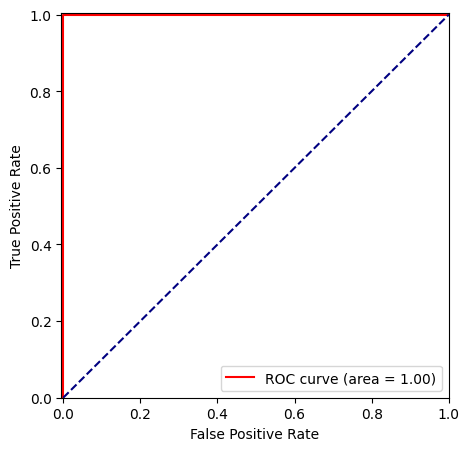

k = 1


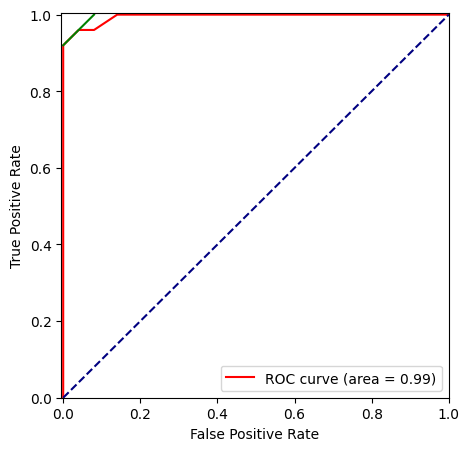

k = 2


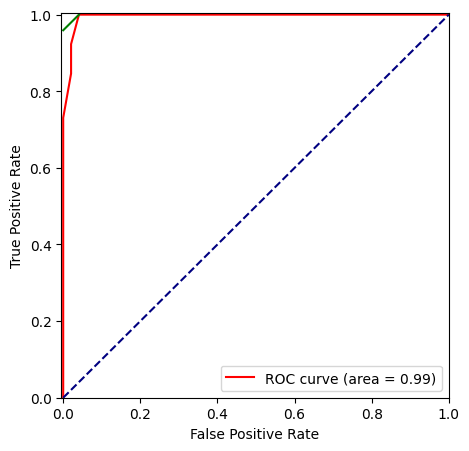

Dataset: wine
k = 0


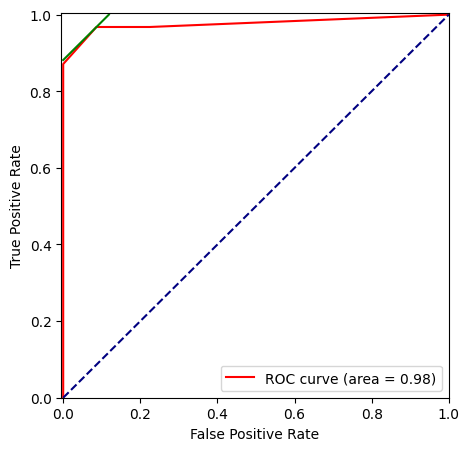

k = 1


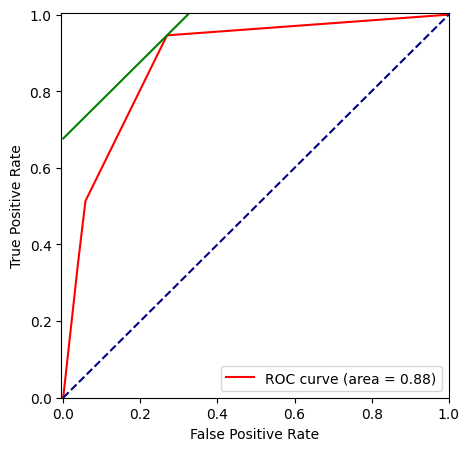

k = 2


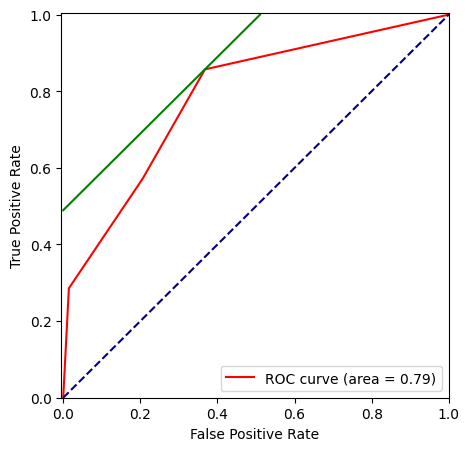

Dataset: cancer
k = 0


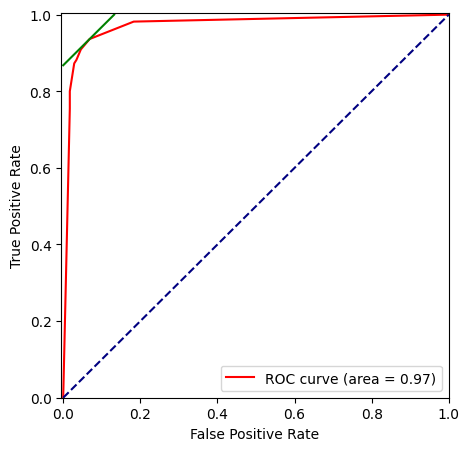

k = 1


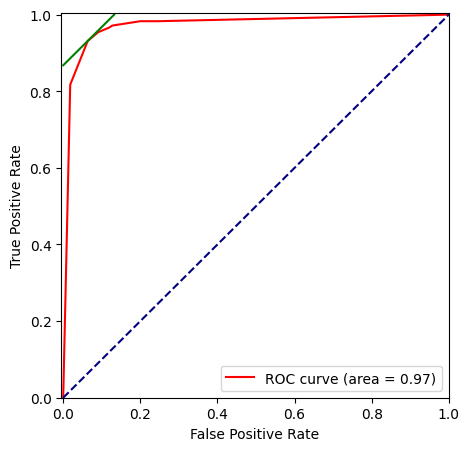

Dataset: digits
k = 0


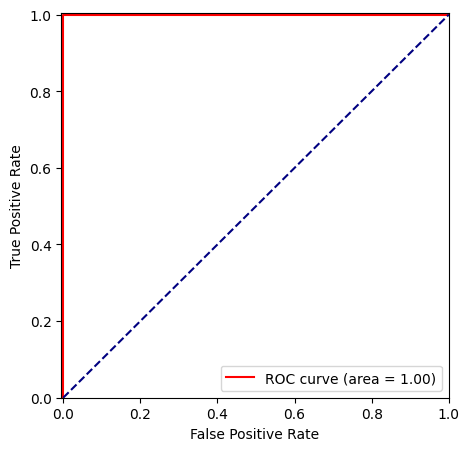

k = 1


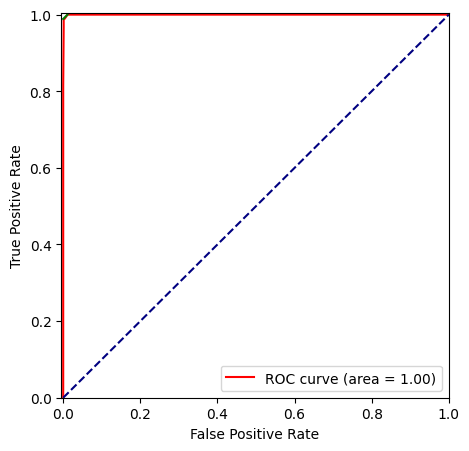

k = 2


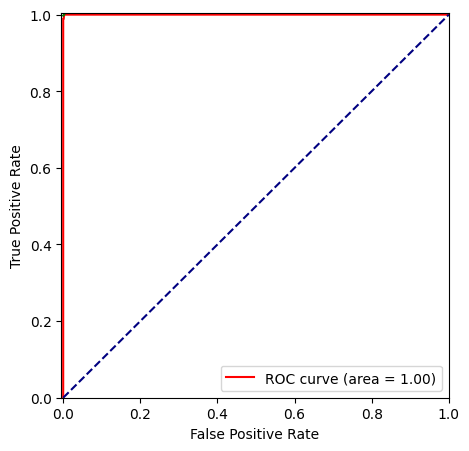

k = 3


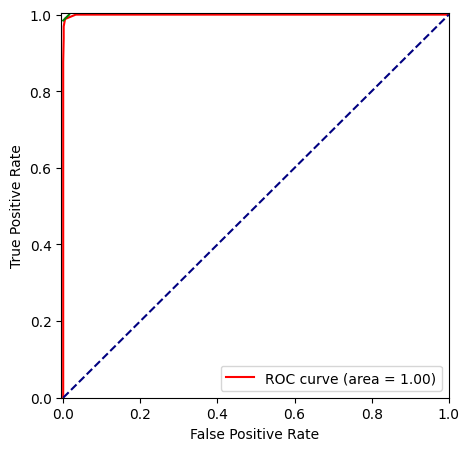

k = 4


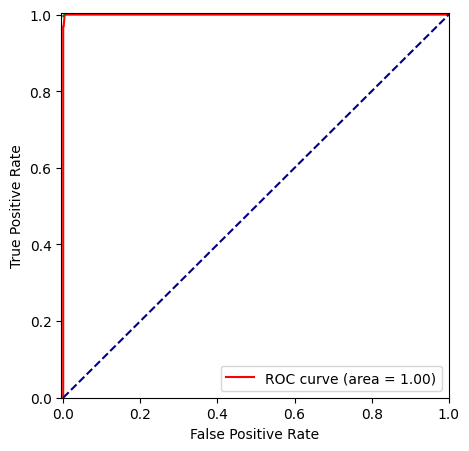

k = 5


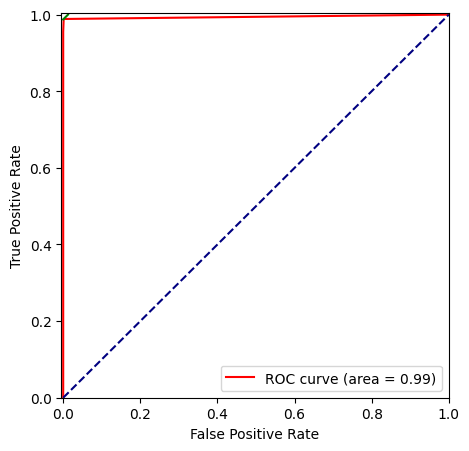

k = 6


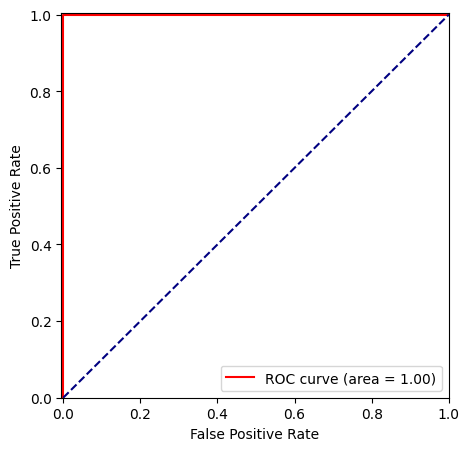

k = 7


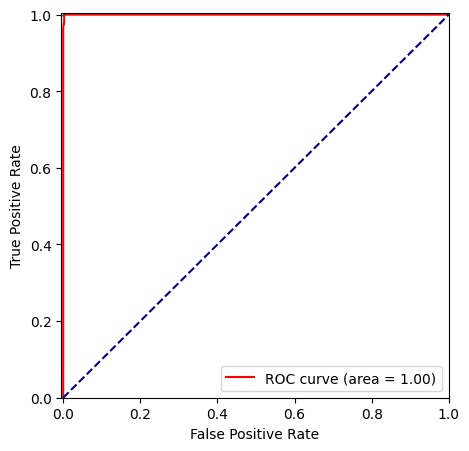

k = 8


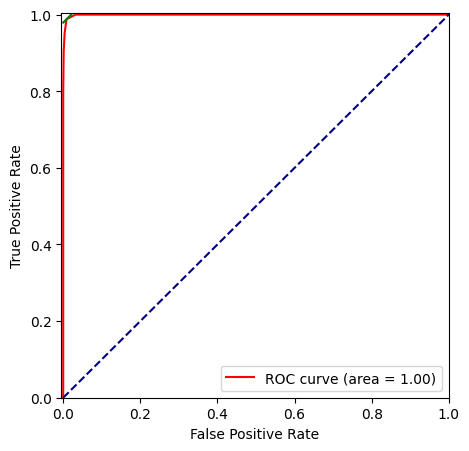

k = 9


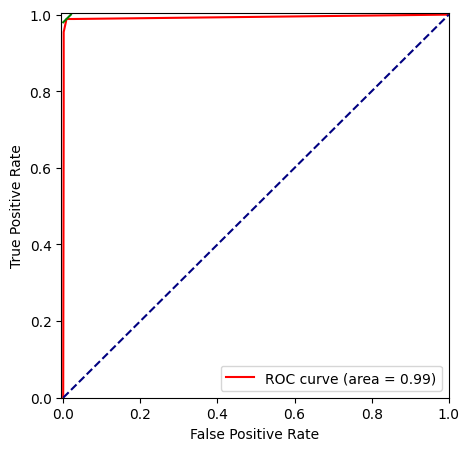

In [ ]:

for dataset, (metrica, bk, _) in best_results.items():
    dataset_name = next(name for data, name in datasets if name.lower() == dataset.lower())
    data = next((data for data, name in datasets if name.lower() == dataset.lower()), None)

    if data is not None:
        print("Dataset: " + dataset_name)
        X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.5)
#Задание три. Построение кривых
        for k in range(len(set(data.target))):
            print("k =", k)
            #кнн строится по лучшим значениям к и метрикам, выясненным в пердыдущих работах
            knn = KNeighborsClassifier(n_neighbors=bk, metric=metrica)
            #проверяем соответствие тренировочных данных
            knn.fit(X_train, y_train)
            #формируем бинарный массив данных для к классов
            y = np.where(y_test == k, np.ones(y_test.shape), np.zeros(y_test.shape))
            #предсказываеим "вероятности" для к - классов
            y_p = knn.predict_proba(X_test)[:, k]
            #вычисляем данные для построения рок-кривых
            fpr, tpr, treshold = roc_curve(y, y_p)
            #рассчитываем площадь под auc для рок кривой
            roc_auc = auc(fpr, tpr)
            #загружаем параметры графика
            plt.rcParams.update({'figure.figsize': (5, 5)})
            #строим рок кривую
            plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
            #проводим диагональ (случайный классификатор)
            plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
            #Построим график рабочей точки (максимизируем истинный положительный показатель - ложно-положительный показатель)
            plt.plot([0, 1-max(tpr - fpr)], [max(tpr - fpr), 1.], color='g', linestyle='-')
            #Установить ограниченияна участок и метки
            plt.xlim([-0.005, 1.0])
            plt.ylim([0.0, 1.005])
            '''Процент ложных срабатываний: Процент ложноположительных результатов рассчитывается как отношение
             количества ложных срабатываний к сумме количества ложных срабатываний и числа истинно отрицательных результатов.'''
            plt.xlabel('False Positive Rate')
            '''Истинный положительный показатель:
            Процент истинно положительных результатов рассчитывается как отношение числа истинно положительных результатов
            к сумме числа истинно положительных результатов и числа ложноотрицательных результатов.'''
            plt.ylabel('True Positive Rate')
            #покажем информацию в правом нижнем углу
            plt.legend(loc="lower right")
            #выведем график
            plt.show()
